In [1]:
import os
from pathlib import Path

try:
    from IPython import get_ipython
    ipynb_path = Path(get_ipython().run_line_magic('pwd', '')).resolve()
except Exception:
    ipynb_path = Path.cwd().resolve()

os.chdir(ipynb_path)
print("Working directory set to:", os.getcwd())


Working directory set to: /Users/wynne/Dropbox/BioGeoFormer/scripts/step_8_evaluating_models


In [2]:
# Import necessary libraries
import pandas as pd
import os
import re
from sklearn.metrics import (
    matthews_corrcoef, accuracy_score, f1_score,
    recall_score, precision_score
)

# Define the path to your directory
directory_path = '../../hmm_run_val_test_anti_split/val_processed_hmm'

# Initialize list to store the metrics for each file
results = []

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv") or filename.endswith(".tsv"):
        # Extract similarity score from the filename using regex
        match = re.search(r'(\d+)', filename)
        similarity_score = int(match.group(1)) if match else None

        # Define the file path and separator
        file_path = os.path.join(directory_path, filename)
        sep = ',' if filename.endswith('.csv') else '\t'

        # Read the file
        df = pd.read_csv(file_path, sep=sep)

        # Drop rows with missing predictions
        df = df.dropna(subset=['predicted_cycle', 'cycle'])

        # Count unassigned predictions before filtering
        unassigned_count = (df['predicted_cycle'].astype(str) == 'unassigned').sum()
        total_count = len(df)
        unassigned_pct = unassigned_count / total_count if total_count > 0 else 0


        # Convert labels to string in case of mixed types
        y_true = df['cycle'].astype(str)
        y_pred = df['predicted_cycle'].astype(str)

        # Compute metrics
        mcc = matthews_corrcoef(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        precision = precision_score(y_true, y_pred, average='weighted')

        # Append results
        results.append({
            'File': filename,
            'Similarity Score': similarity_score,
            'MCC': mcc,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Recall': recall,
            'Precision': precision,
            'Unassigned Count': unassigned_count,
            'Unassigned proportion': unassigned_pct,
            'Set': 'Validation',
            'Model': 'HMM'
        })

# Create and display sorted results dataframe
results_hmm_val_df = pd.DataFrame(results).sort_values(by='Similarity Score')
display(results_hmm_val_df)



/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

,File,Similarity Score,MCC,Accuracy,F1 Score,Recall,Precision,Unassigned Count,Unassigned proportion,Set,Model
4,merged_data_20.csv,20,0.757893,0.770289,0.783891,0.770289,0.819118,1205,0.005335,Validation,HMM
3,merged_data_30.csv,30,0.757620,0.769982,0.785686,0.769982,0.822745,1203,0.005326,Validation,HMM
8,merged_data_40.csv,40,0.699195,0.717166,0.742903,0.717166,0.816241,1783,0.007923,Validation,HMM
5,merged_data_50.csv,50,0.845433,0.853698,0.866216,0.853698,0.893760,1187,0.004936,Validation,HMM
2,merged_data_60.csv,60,0.616109,0.630641,0.583138,0.630641,0.568989,2859,0.010463,Validation,HMM
0,merged_data_70.csv,70,0.538727,0.554488,0.488126,0.554488,0.460324,3927,0.012190,Validation,HMM
7,merged_data_80.csv,80,0.447009,0.464090,0.386996,0.464090,0.355747,5255,0.017641,Validation,HMM
6,merged_data_90.csv,90,0.453247,0.470731,0.391090,0.470731,0.354587,4581,0.014072,Validation,HMM
1,merged_data_100.csv,100,0.869531,0.876624,0.883783,0.876624,0.900376,941,0.002915,Validation,HMM


In [3]:
# Import necessary libraries
import pandas as pd
import os
import re
from sklearn.metrics import (
    matthews_corrcoef, accuracy_score, f1_score,
    recall_score, precision_score
)

# Define the path to your directory
directory_path = '../../hmm_run_val_test_anti_split/test_processed_hmm'

# Initialize list to store the metrics for each file
results = []

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv") or filename.endswith(".tsv"):
        # Extract similarity score from the filename using regex
        match = re.search(r'(\d+)', filename)
        similarity_score = int(match.group(1)) if match else None

        # Define the file path and separator
        file_path = os.path.join(directory_path, filename)
        sep = ',' if filename.endswith('.csv') else '\t'

        # Read the file
        df = pd.read_csv(file_path, sep=sep)

        # Drop rows with missing predictions
        df = df.dropna(subset=['predicted_cycle', 'cycle'])

        # Count unassigned predictions before filtering
        unassigned_count = (df['predicted_cycle'].astype(str) == 'unassigned').sum()
        total_count = len(df)
        unassigned_pct = unassigned_count / total_count if total_count > 0 else 0


        # Convert labels to string in case of mixed types
        y_true = df['cycle'].astype(str)
        y_pred = df['predicted_cycle'].astype(str)

        # Compute metrics
        mcc = matthews_corrcoef(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        precision = precision_score(y_true, y_pred, average='weighted')

        # Append results
        results.append({
            'File': filename,
            'Similarity Score': similarity_score,
            'MCC': mcc,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Recall': recall,
            'Precision': precision,
            'Unassigned Count': unassigned_count,
            'Unassigned proportion': unassigned_pct,
            'Set': 'Test',
            'Model': 'HMM'
        })

# Create and display sorted results dataframe
results_hmm_test_df = pd.DataFrame(results).sort_values(by='Similarity Score')
display(results_hmm_test_df)


/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

,File,Similarity Score,MCC,Accuracy,F1 Score,Recall,Precision,Unassigned Count,Unassigned proportion,Set,Model
4,merged_data_20.csv,20,0.757067,0.771694,0.784112,0.771694,0.819987,2175,0.008066,Test,HMM
3,merged_data_30.csv,30,0.756336,0.771115,0.785793,0.771115,0.823608,2498,0.009262,Test,HMM
8,merged_data_40.csv,40,0.715900,0.729836,0.752806,0.729836,0.819035,3445,0.010388,Test,HMM
5,merged_data_50.csv,50,0.789733,0.799409,0.811685,0.799409,0.845040,1663,0.005773,Test,HMM
2,merged_data_60.csv,60,0.592786,0.608872,0.563071,0.608872,0.549651,3077,0.011742,Test,HMM
0,merged_data_70.csv,70,0.494486,0.509750,0.436321,0.509750,0.401790,4047,0.013403,Test,HMM
7,merged_data_80.csv,80,0.453566,0.470568,0.389336,0.470568,0.356898,5132,0.016809,Test,HMM
6,merged_data_90.csv,90,0.444844,0.461171,0.382773,0.461171,0.347027,5111,0.015554,Test,HMM
1,merged_data_100.csv,100,0.869292,0.876378,0.883618,0.876378,0.900395,960,0.002975,Test,HMM


In [6]:
os.getcwd()

'/Users/wynne/Dropbox/BioGeoFormer/scripts/step_8_evaluating_models'

In [7]:
# Import necessary libraries
import pandas as pd
import os
import re
from sklearn.metrics import (
    matthews_corrcoef, accuracy_score, f1_score,
    recall_score, precision_score
)

# Define the path to your directory
directory_path = '../../diamond_run_val_test_anti_split/val_test_processed/diamond_output_val'

# Initialize list to store the metrics for each file
results = []

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv") or filename.endswith(".tsv"):
        # Extract similarity score from the filename using regex
        match = re.search(r'(\d+)', filename)
        similarity_score = int(match.group(1)) if match else None

        # Define the file path and separator
        file_path = os.path.join(directory_path, filename)
        sep = ',' if filename.endswith('.csv') else '\t'

        # Read the file
        df = pd.read_csv(file_path, sep=sep)

        # Drop rows with missing predictions
        df = df.dropna(subset=['query_cycle', 'subject_cycle'])

        # Count unassigned predictions before filtering
        unassigned_count = (df['query_cycle'].astype(str) == 'unassigned').sum()
        total_count = len(df)
        unassigned_pct = unassigned_count / total_count if total_count > 0 else 0


        # Convert labels to string in case of mixed types
        y_true = df['subject_cycle'].astype(str)
        y_pred = df['query_cycle'].astype(str)

        # Compute metrics
        mcc = matthews_corrcoef(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        precision = precision_score(y_true, y_pred, average='weighted')

        # Append results
        results.append({
            'File': filename,
            'Similarity Score': similarity_score,
            'MCC': mcc,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Recall': recall,
            'Precision': precision,
            'Unassigned Count': unassigned_count,
            'Unassigned proportion': unassigned_pct,
            'Set': 'Validation',
            'Model': 'DIAMOND'
        })

# Create and display sorted results dataframe
results_diamond_val_df = pd.DataFrame(results).sort_values(by='Similarity Score')
display(results_diamond_val_df)


/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

,File,Similarity Score,MCC,Accuracy,F1 Score,Recall,Precision,Unassigned Count,Unassigned proportion,Set,Model
6,diamond_val_20.csv,20,0.943307,0.946216,0.958752,0.946216,0.988549,969,0.004290,Validation,DIAMOND
5,diamond_val_30.csv,30,0.943308,0.946216,0.958750,0.946216,0.988549,969,0.004290,Validation,DIAMOND
3,diamond_val_40.csv,40,0.913378,0.918726,0.931186,0.918726,0.966852,1103,0.004901,Validation,DIAMOND
1,diamond_val_50.csv,50,0.985052,0.986087,0.987928,0.986087,0.990212,963,0.004004,Validation,DIAMOND
8,diamond_val_60.csv,60,0.978610,0.980121,0.980758,0.980121,0.983189,1022,0.003740,Validation,DIAMOND
7,diamond_val_70.csv,70,0.979373,0.980766,0.981210,0.980766,0.983652,555,0.001723,Validation,DIAMOND
4,diamond_val_80.csv,80,0.983725,0.984870,0.985911,0.984870,0.988881,561,0.001883,Validation,DIAMOND
0,diamond_val_90.csv,90,0.990148,0.990843,0.991732,0.990843,0.992786,571,0.001754,Validation,DIAMOND
2,diamond_val_100.csv,100,0.995319,0.995654,0.996347,0.995654,0.997041,450,0.001394,Validation,DIAMOND


In [10]:
# Import necessary libraries
import pandas as pd
import os
import re
from sklearn.metrics import (
    matthews_corrcoef, accuracy_score, f1_score,
    recall_score, precision_score
)

# Define the path to your directory
directory_path = '../../diamond_run_val_test_anti_split/val_test_processed/diamond_output_test'

# Initialize list to store the metrics for each file
results = []

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv") or filename.endswith(".tsv"):
        # Extract similarity score from the filename using regex
        match = re.search(r'(\d+)', filename)
        similarity_score = int(match.group(1)) if match else None

        # Define the file path and separator
        file_path = os.path.join(directory_path, filename)
        sep = ',' if filename.endswith('.csv') else '\t'

        # Read the file
        df = pd.read_csv(file_path, sep=sep)

        # Drop rows with missing predictions
        df = df.dropna(subset=['query_cycle', 'subject_cycle'])

        # Count unassigned predictions before filtering
        unassigned_count = (df['subject_cycle'].astype(str) == 'unassigned').sum()
        total_count = len(df)
        unassigned_pct = unassigned_count / total_count if total_count > 0 else 0


        # Convert labels to string in case of mixed types
        y_true = df['subject_cycle'].astype(str)
        y_pred = df['query_cycle'].astype(str)

        # Compute metrics
        mcc = matthews_corrcoef(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        precision = precision_score(y_true, y_pred, average='weighted')

        # Append results
        results.append({
            'File': filename,
            'Similarity Score': similarity_score,
            'MCC': mcc,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Recall': recall,
            'Precision': precision,
            'Unassigned Count': unassigned_count,
            'Unassigned proportion': unassigned_pct,
            'Set': 'Test',
            'Model': 'DIAMOND'
        })

# Create and display sorted results dataframe
results_diamond_test_df = pd.DataFrame(results).sort_values(by='Similarity Score')
display(results_diamond_test_df)


/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

,File,Similarity Score,MCC,Accuracy,F1 Score,Recall,Precision,Unassigned Count,Unassigned proportion,Set,Model
3,diamond_test_20.csv,20,0.980643,0.982402,0.979719,0.982402,0.977687,1465,0.005433,Test,DIAMOND
4,diamond_test_30.csv,30,0.980649,0.982407,0.979728,0.982407,0.977700,1463,0.005424,Test,DIAMOND
6,diamond_test_40.csv,40,0.968993,0.971597,0.970152,0.971597,0.969623,1665,0.005021,Test,DIAMOND
7,diamond_test_50.csv,50,0.973785,0.975472,0.974476,0.975472,0.976365,1158,0.004020,Test,DIAMOND
0,diamond_test_60.csv,60,0.984843,0.985968,0.984390,0.985968,0.983659,796,0.003038,Test,DIAMOND
1,diamond_test_70.csv,70,0.986700,0.987620,0.986899,0.987620,0.987947,681,0.002255,Test,DIAMOND
5,diamond_test_80.csv,80,0.983794,0.984914,0.983972,0.984914,0.984060,560,0.001834,Test,DIAMOND
8,diamond_test_90.csv,90,0.989906,0.990627,0.989803,0.990627,0.989024,538,0.001637,Test,DIAMOND
2,diamond_test_100.csv,100,0.995168,0.995513,0.994840,0.995513,0.994172,437,0.001354,Test,DIAMOND


In [11]:
combined_df = pd.concat([results_hmm_test_df, results_hmm_val_df, results_diamond_test_df, results_diamond_val_df])
display(combined_df)

,File,Similarity Score,MCC,Accuracy,F1 Score,Recall,Precision,Unassigned Count,Unassigned proportion,Set,Model
4,merged_data_20.csv,20,0.757067,0.771694,0.784112,0.771694,0.819987,2175,0.008066,Test,HMM
3,merged_data_30.csv,30,0.756336,0.771115,0.785793,0.771115,0.823608,2498,0.009262,Test,HMM
8,merged_data_40.csv,40,0.715900,0.729836,0.752806,0.729836,0.819035,3445,0.010388,Test,HMM
5,merged_data_50.csv,50,0.789733,0.799409,0.811685,0.799409,0.845040,1663,0.005773,Test,HMM
2,merged_data_60.csv,60,0.592786,0.608872,0.563071,0.608872,0.549651,3077,0.011742,Test,HMM
0,merged_data_70.csv,70,0.494486,0.509750,0.436321,0.509750,0.401790,4047,0.013403,Test,HMM
7,merged_data_80.csv,80,0.453566,0.470568,0.389336,0.470568,0.356898,5132,0.016809,Test,HMM
6,merged_data_90.csv,90,0.444844,0.461171,0.382773,0.461171,0.347027,5111,0.015554,Test,HMM
1,merged_data_100.csv,100,0.869292,0.876378,0.883618,0.876378,0.900395,960,0.002975,Test,HMM
4,merged_data_20.csv,20,0.757893,0.770289,0.783891,0.770289,0.819118,1205,0.005335,Validation,HMM


In [12]:
import pandas as pd


### calculated from the built-in hugging face metric calculations, with the code in training_scaling_running_BGF folder (step 6)
test_data = {
    'Similarity Score': [20, 30, 40, 50, 60, 70, 80, 90],
    'MCC': [
        0.8274398490600272,  # 20
        0.9071769230030186,  # 30
        0.8967426891556874,  # 40
        0.8982648785457656,  # 50
        0.9383896580306839,  # 60
        0.9507979347679958,  # 70
        0.9537479982912606,  # 80
        0.9409650093224834   # 90
    ],
    'Accuracy': [
        0.8393640350877193,  # 20
        0.9153942159197384,  # 30
        0.9048475525814909,  # 40
        0.9046187577134426,  # 50
        0.9428591958913383,  # 60
        0.9541469038208169,  # 70
        0.9569558378076208,  # 80
        0.9449410741097674   # 90
    ],
    'F1 Score': [
        0.8257698698285975,  # 20
        0.918216150219967,  # 30
        0.9087481407113033,  # 40
        0.9096209253346729,  # 50
        0.944957916968542,   # 60
        0.9556211052319736,  # 70
        0.9582596620536806,  # 80
        0.945624336338964    # 90
    ],
    'Recall': [
        0.8393640350877193,  # 20
        0.9153942159197384,  # 30
        0.9048475525814909,  # 40
        0.9046187577134426,  # 50
        0.9428591958913383,  # 60
        0.9541469038208169,  # 70
        0.9569558378076208,  # 80
        0.9449410741097674   # 90
    ],
    'Precision': [
        0.8841988491558497,  # 20
        0.9259553854409623,  # 30
        0.9254295415870504,  # 40
        0.9240549915337696,  # 50
        0.9509177023246881,  # 60
        0.9594677657095954,  # 70
        0.9618609084424217,  # 80
        0.9539379291462333   # 90
    ],
    'Unassigned Count': [0.0] * 8,
    'Unassigned proportion': [0.0] * 8,
    'Set': ['Test'] * 8
}

test_df = pd.DataFrame(test_data)
test_df['Model'] = 'Transformer'
test_df['File'] = 'transformer_test_' + test_df['Similarity Score'].astype(str) + '.csv'



# --- Step 2: Manually input Transformer VALIDATION metrics ---
val_data = {
    'Similarity Score': [20, 30, 40, 50, 60, 70, 80, 90],
    'MCC': [
        0.8481911259277192,
        0.8351257245885633,
        0.8434513474718773,
        0.9261323682213192,
        0.9409235802950227,
        0.9545945635516756,
        0.9573077673861179,
        0.9577848407809524
    ],
    'Accuracy': [
        0.8578164013387403,
        0.8458521296046253,
        0.854545858514042,
        0.9310899701457784,
        0.9452373633129858,
        0.9577018830205313,
        0.9603433574368374,
        0.9607048068416396
    ],
    'F1 Score': [
        0.8480741046841647,
        0.8402275332989669,
        0.8553535955907359,
        0.9340576781766249,
        0.9466135042084884,
        0.9589468940314931,
        0.9610576161451159,
        0.9616689243703047
    ],
    'Recall': [
        0.8578164013387403,
        0.8458521296046253,
        0.854545858514042,
        0.9310899701457784,
        0.9452373633129858,
        0.9577018830205313,
        0.9603433574368374,
        0.9607048068416396
    ],
    'Precision': [
        0.8842662101389382,
        0.8567240987123746,
        0.8904495151590346,
        0.9412384642328464,
        0.9511937715149694,
        0.9617740854536292,
        0.9636864309883458,
        0.9640980434886854
    ],
    'Unassigned Count': [0.0] * 8,
    'Unassigned proportion': [0.0] * 8,
    'Set': ['Validation'] * 8
}



val_df = pd.DataFrame(val_data)
val_df['Model'] = 'Transformer'
val_df['File'] = 'transformer_val_' + val_df['Similarity Score'].astype(str) + '.csv'


# --- Step 3: Combine with your existing results ---
transformer_df = pd.concat([test_df, val_df], ignore_index=True)

# Merge all into a full dataframe
full_df = pd.concat([combined_df, transformer_df], ignore_index=True)

# Sort and display
full_df = full_df.sort_values(by=['Set', 'Similarity Score', 'Model'])
display(full_df)

,File,Similarity Score,MCC,Accuracy,F1 Score,Recall,Precision,Unassigned Count,Unassigned proportion,Set,Model
18,diamond_test_20.csv,20,0.980643,0.982402,0.979719,0.982402,0.977687,1465.0,0.005433,Test,DIAMOND
0,merged_data_20.csv,20,0.757067,0.771694,0.784112,0.771694,0.819987,2175.0,0.008066,Test,HMM
36,transformer_test_20.csv,20,0.827440,0.839364,0.825770,0.839364,0.884199,0.0,0.000000,Test,Transformer
19,diamond_test_30.csv,30,0.980649,0.982407,0.979728,0.982407,0.977700,1463.0,0.005424,Test,DIAMOND
1,merged_data_30.csv,30,0.756336,0.771115,0.785793,0.771115,0.823608,2498.0,0.009262,Test,HMM
37,transformer_test_30.csv,30,0.907177,0.915394,0.918216,0.915394,0.925955,0.0,0.000000,Test,Transformer
20,diamond_test_40.csv,40,0.968993,0.971597,0.970152,0.971597,0.969623,1665.0,0.005021,Test,DIAMOND
2,merged_data_40.csv,40,0.715900,0.729836,0.752806,0.729836,0.819035,3445.0,0.010388,Test,HMM
38,transformer_test_40.csv,40,0.896743,0.904848,0.908748,0.904848,0.925430,0.0,0.000000,Test,Transformer
21,diamond_test_50.csv,50,0.973785,0.975472,0.974476,0.975472,0.976365,1158.0,0.004020,Test,DIAMOND


In [13]:
# Filter out unwanted similarity scores
filtered_df = full_df[~full_df['Similarity Score'].isin([100])]

# Display the filtered dataframe
display(filtered_df)


,File,Similarity Score,MCC,Accuracy,F1 Score,Recall,Precision,Unassigned Count,Unassigned proportion,Set,Model
18,diamond_test_20.csv,20,0.980643,0.982402,0.979719,0.982402,0.977687,1465.0,0.005433,Test,DIAMOND
0,merged_data_20.csv,20,0.757067,0.771694,0.784112,0.771694,0.819987,2175.0,0.008066,Test,HMM
36,transformer_test_20.csv,20,0.827440,0.839364,0.825770,0.839364,0.884199,0.0,0.000000,Test,Transformer
19,diamond_test_30.csv,30,0.980649,0.982407,0.979728,0.982407,0.977700,1463.0,0.005424,Test,DIAMOND
1,merged_data_30.csv,30,0.756336,0.771115,0.785793,0.771115,0.823608,2498.0,0.009262,Test,HMM
37,transformer_test_30.csv,30,0.907177,0.915394,0.918216,0.915394,0.925955,0.0,0.000000,Test,Transformer
20,diamond_test_40.csv,40,0.968993,0.971597,0.970152,0.971597,0.969623,1665.0,0.005021,Test,DIAMOND
2,merged_data_40.csv,40,0.715900,0.729836,0.752806,0.729836,0.819035,3445.0,0.010388,Test,HMM
38,transformer_test_40.csv,40,0.896743,0.904848,0.908748,0.904848,0.925430,0.0,0.000000,Test,Transformer
21,diamond_test_50.csv,50,0.973785,0.975472,0.974476,0.975472,0.976365,1158.0,0.004020,Test,DIAMOND


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Filter for Transformer results ---
transformer_df = filtered_df[filtered_df["Model"] == "Transformer"]

# Reshape into long format
long_df = transformer_df.melt(
    id_vars=["Similarity Score", "Set"],
    value_vars=["MCC", "Accuracy", "F1 Score", "Recall", "Precision"],
    var_name="Metric",
    value_name="Value"
)

# Pivot so rows = Metric, columns = (Similarity Score, Set)
publish_table = long_df.pivot_table(
    index="Metric",
    columns=["Similarity Score", "Set"],
    values="Value",
    aggfunc="first"
)

# Round values for readability
publish_table = publish_table.round(3)

# Reorder columns → Validation first, then Test
new_cols = []
for sim in sorted(set(publish_table.columns.get_level_values(0))):
    if ("Validation" in publish_table[sim]):
        new_cols.append((sim, "Validation"))
    if ("Test" in publish_table[sim]):
        new_cols.append((sim, "Test"))
publish_table = publish_table[new_cols]

# --- Save as LaTeX (.tex) ---
publish_table.to_latex(
    "../../results/tables/table_1_transformer_performance_metrics_val_test.tex",
    caption="Transformer performance metrics across similarity bins (Validation and Test).",
    label="tab:transformer_metrics",
    index=True,  # keep metric names
    escape=False,
    multicolumn=True,
    multicolumn_format='c',
    bold_rows=True
)
display(publish_table)

Similarity Score         20                30                40         \
Set              Validation   Test Validation   Test Validation   Test   
Metric                                                                   
Accuracy              0.858  0.839      0.846  0.915      0.855  0.905   
F1 Score              0.848  0.826      0.840  0.918      0.855  0.909   
MCC                   0.848  0.827      0.835  0.907      0.843  0.897   
Precision             0.884  0.884      0.857  0.926      0.890  0.925   
Recall                0.858  0.839      0.846  0.915      0.855  0.905   

Similarity Score         50                60                70         \
Set              Validation   Test Validation   Test Validation   Test   
Metric                                                                   
Accuracy              0.931  0.905      0.945  0.943      0.958  0.954   
F1 Score              0.934  0.910      0.947  0.945      0.959  0.956   
MCC                   0.926  0.898      0.941  0.938      0.955  0.951   
Precision             0.941  0.924      0.951  0.951      0.962  0.959   
Recall                0.931  0.905      0.945  0.943      0.958  0.954   

Similarity Score         80                90         
Set              Validation   Test Validation   Test  
Metric                                                
Accuracy              0.960  0.957      0.961  0.945  
F1 Score              0.961  0.958      0.962  0.946  
MCC                   0.957  0.954      0.958  0.941  
Precision             0.964  0.962      0.964  0.954  
Recall                0.960  0.957      0.961  0.945

In [17]:
import pandas as pd
import os
from sklearn.metrics import (
    matthews_corrcoef, accuracy_score, f1_score,
    recall_score, precision_score
)

# Path to the folder with merged_X_underX.csv files
directory_path = '../../filtered_test_set/final_filtered_test/identity_split_filtered_by_identity/'


results = []

for filename in os.listdir(directory_path):
    if filename.startswith("merged_") and filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)

        # Read CSV (these are all CSV, not TSV, right?)
        df = pd.read_csv(file_path)

        # Drop rows missing predictions
        df = df.dropna(subset=['query_cycle', 'subject_cycle'])

        # Count unassigned
        unassigned_count = (df['subject_cycle'].astype(str) == 'unassigned').sum()
        total_count = len(df)
        unassigned_pct = unassigned_count / total_count if total_count > 0 else 0

        # Convert labels to string
        y_true = df['subject_cycle'].astype(str)
        y_pred = df['query_cycle'].astype(str)

        # Metrics
        mcc = matthews_corrcoef(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        precision = precision_score(y_true, y_pred, average='weighted')

        # Similarity comes from the dataframe itself
        similarity_score = df['Similarity'].iloc[0] if 'Similarity' in df.columns else None

        results.append({
            'File': filename,
            'Similarity Score': similarity_score,
            'MCC': mcc,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Recall': recall,
            'Precision': precision,
            'Unassigned Count': unassigned_count,
            'Unassigned proportion': unassigned_pct,
            'Set': 'Filtered-Test',
            'Model': 'DIAMOND'
        })

# Collate into one dataframe
results_diamond_filtered_test_df = pd.DataFrame(results).sort_values(by='Similarity Score')
display(results_diamond_filtered_test_df)


/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

,File,Similarity Score,MCC,Accuracy,F1 Score,Recall,Precision,Unassigned Count,Unassigned proportion,Set,Model
2,merged_20_under20.csv,20.0,0.011364,0.000897,0.000028,0.000897,0.000014,3335,0.997010,Filtered-Test,DIAMOND
3,merged_30_under30.csv,30.0,0.454019,0.442852,0.403829,0.442852,0.388037,2731,0.471512,Filtered-Test,DIAMOND
5,merged_40_under40.csv,40.0,0.838128,0.843660,0.824627,0.843660,0.817286,1915,0.071522,Filtered-Test,DIAMOND
4,merged_50_under50.csv,50.0,0.947334,0.950094,0.945985,0.950094,0.942872,1291,0.020817,Filtered-Test,DIAMOND
7,merged_60_under60.csv,60.0,0.980410,0.981515,0.978839,0.981515,0.976617,874,0.006632,Filtered-Test,DIAMOND
6,merged_70_under70.csv,70.0,0.983793,0.984761,0.983658,0.984761,0.984863,758,0.003351,Filtered-Test,DIAMOND
1,merged_80_under80.csv,80.0,0.991145,0.991734,0.990886,0.991734,0.990152,608,0.001881,Filtered-Test,DIAMOND
0,merged_90_under90.csv,90.0,0.993126,0.993596,0.992961,0.993596,0.992399,577,0.001384,Filtered-Test,DIAMOND


In [18]:
import pandas as pd
import os
from sklearn.metrics import (
    matthews_corrcoef, accuracy_score, f1_score,
    recall_score, precision_score
)

# Path to the folder with merged_X_underX.csv files
directory_path = '../../filtered_test_set/final_filtered_test/identity_split_filtered_by_identity/'

results = []

for filename in os.listdir(directory_path):
    if filename.startswith("merged_") and filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)

        # Read CSV
        df = pd.read_csv(file_path)

        # Drop rows with missing values in relevant columns
        df = df.dropna(subset=['predicted_cycle', 'cycle'])

        # Count unassigned predictions
        unassigned_count = (df['predicted_cycle'].astype(str) == 'unassigned').sum()
        total_count = len(df)
        unassigned_pct = unassigned_count / total_count if total_count > 0 else 0

        # Define truth and predictions
        y_true = df['cycle'].astype(str)
        y_pred = df['predicted_cycle'].astype(str)

        # Compute metrics
        mcc = matthews_corrcoef(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        precision = precision_score(y_true, y_pred, average='weighted')

        # Similarity is in the dataframe
        similarity_score = df['Similarity'].iloc[0] if 'Similarity' in df.columns else None

        results.append({
            'File': filename,
            'Similarity Score': similarity_score,
            'MCC': mcc,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Recall': recall,
            'Precision': precision,
            'Unassigned Count': unassigned_count,
            'Unassigned proportion': unassigned_pct,
            'Set': 'Filtered-Test',
            'Model': 'HMM'
        })

# Combine into dataframe
results_hmm_filtered_test_df = pd.DataFrame(results).sort_values(by='Similarity Score')
display(results_hmm_filtered_test_df)


/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

,File,Similarity Score,MCC,Accuracy,F1 Score,Recall,Precision,Unassigned Count,Unassigned proportion,Set,Model
2,merged_20_under20.csv,20.0,0.011166,0.031091,0.020344,0.031091,0.036117,137,0.040957,Filtered-Test,HMM
3,merged_30_under30.csv,30.0,0.080682,0.101347,0.117433,0.101347,0.341366,216,0.037293,Filtered-Test,HMM
5,merged_40_under40.csv,40.0,0.487064,0.503417,0.509584,0.503417,0.609561,436,0.016284,Filtered-Test,HMM
4,merged_50_under50.csv,50.0,0.665805,0.676605,0.688048,0.676605,0.764858,632,0.010191,Filtered-Test,HMM
7,merged_60_under60.csv,60.0,0.673552,0.684140,0.706568,0.684140,0.807190,1239,0.009402,Filtered-Test,HMM
6,merged_70_under70.csv,70.0,0.636438,0.649315,0.665528,0.649315,0.789905,2112,0.009337,Filtered-Test,HMM
1,merged_80_under80.csv,80.0,0.600035,0.614494,0.637193,0.614494,0.796935,3897,0.012055,Filtered-Test,HMM
0,merged_90_under90.csv,90.0,0.586846,0.601219,0.624405,0.601219,0.797900,4807,0.011530,Filtered-Test,HMM


In [19]:
import pandas as pd
import os
from sklearn.metrics import (
    matthews_corrcoef, accuracy_score, f1_score,
    recall_score, precision_score
)

# Path to the folder with merged_X_underX.csv files
directory_path = '../../filtered_test_set/final_filtered_test/identity_split_filtered_by_identity/'

results = []

for filename in os.listdir(directory_path):
    if filename.startswith("merged_") and filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)

        # Read CSV
        df = pd.read_csv(file_path)

        # Drop rows with missing values in relevant columns
        df = df.dropna(subset=['prediction', 'cycle'])

        # Count unassigned predictions
        unassigned_count = (df['prediction'].astype(str) == 'unassigned').sum()
        total_count = len(df)
        unassigned_pct = unassigned_count / total_count if total_count > 0 else 0

        # Define truth and predictions
        y_true = df['cycle'].astype(str)
        y_pred = df['prediction'].astype(str)

        # Compute metrics
        mcc = matthews_corrcoef(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        precision = precision_score(y_true, y_pred, average='weighted')

        # Similarity is in the dataframe
        similarity_score = df['Similarity'].iloc[0] if 'Similarity' in df.columns else None

        results.append({
            'File': filename,
            'Similarity Score': similarity_score,
            'MCC': mcc,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Recall': recall,
            'Precision': precision,
            'Unassigned Count': unassigned_count,
            'Unassigned proportion': unassigned_pct,
            'Set': 'Filtered-Test',
            'Model': 'Transformer'
        })

# Combine into dataframe
results_transformer_filtered_test_df = pd.DataFrame(results).sort_values(by='Similarity Score')
display(results_transformer_filtered_test_df)


/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/wynne/opt/anaconda3/envs/metaphor/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

,File,Similarity Score,MCC,Accuracy,F1 Score,Recall,Precision,Unassigned Count,Unassigned proportion,Set,Model
2,merged_20_under20.csv,20.0,0.085634,0.100448,0.087765,0.100448,0.152958,0,0.0,Filtered-Test,Transformer
3,merged_30_under30.csv,30.0,0.247122,0.270718,0.258174,0.270718,0.407088,0,0.0,Filtered-Test,Transformer
5,merged_40_under40.csv,40.0,0.623171,0.636639,0.646203,0.636639,0.718774,0,0.0,Filtered-Test,Transformer
4,merged_50_under50.csv,50.0,0.800354,0.809907,0.817188,0.809907,0.843510,0,0.0,Filtered-Test,Transformer
7,merged_60_under60.csv,60.0,0.878978,0.885324,0.888159,0.885324,0.900353,0,0.0,Filtered-Test,Transformer
6,merged_70_under70.csv,70.0,0.918318,0.923043,0.925178,0.923043,0.931179,0,0.0,Filtered-Test,Transformer
1,merged_80_under80.csv,80.0,0.939098,0.943006,0.944855,0.943006,0.949084,0,0.0,Filtered-Test,Transformer
0,merged_90_under90.csv,90.0,0.941096,0.944963,0.946624,0.944963,0.950847,0,0.0,Filtered-Test,Transformer


In [20]:
# Combine DIAMOND, HMM, Transformer filtered-test results
new_filtered_df = pd.concat([
    results_diamond_filtered_test_df,
    results_hmm_filtered_test_df,
    results_transformer_filtered_test_df
], ignore_index=True)

# Now combine with your existing Test/Validation dataframe
all_results_df = pd.concat([
    filtered_df,
    new_filtered_df
], ignore_index=True)

# Sort by Similarity Score, then Model, then Set
all_results_df = all_results_df.sort_values(by=['Similarity Score', 'Model', 'Set'])

display(all_results_df)


,File,Similarity Score,MCC,Accuracy,F1 Score,Recall,Precision,Unassigned Count,Unassigned proportion,Set,Model
48,merged_20_under20.csv,20.0,0.011364,0.000897,0.000028,0.000897,0.000014,3335.0,0.997010,Filtered-Test,DIAMOND
0,diamond_test_20.csv,20.0,0.980643,0.982402,0.979719,0.982402,0.977687,1465.0,0.005433,Test,DIAMOND
24,diamond_val_20.csv,20.0,0.943307,0.946216,0.958752,0.946216,0.988549,969.0,0.004290,Validation,DIAMOND
56,merged_20_under20.csv,20.0,0.011166,0.031091,0.020344,0.031091,0.036117,137.0,0.040957,Filtered-Test,HMM
1,merged_data_20.csv,20.0,0.757067,0.771694,0.784112,0.771694,0.819987,2175.0,0.008066,Test,HMM
...,...,...,...,...,...,...,...,...,...,...,...
22,merged_data_90.csv,90.0,0.444844,0.461171,0.382773,0.461171,0.347027,5111.0,0.015554,Test,HMM
46,merged_data_90.csv,90.0,0.453247,0.470731,0.391090,0.470731,0.354587,4581.0,0.014072,Validation,HMM
71,merged_90_under90.csv,90.0,0.941096,0.944963,0.946624,0.944963,0.950847,0.0,0.000000,Filtered-Test,Transformer
23,transformer_test_90.csv,90.0,0.940965,0.944941,0.945624,0.944941,0.953938,0.0,0.000000,Test,Transformer


In [ ]:
#!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.7/109.7 kB 1.4 MB/s eta 0:00:00a 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 15.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 8.9 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 16.0 MB/s eta 0:00:0000:0100:01


In [21]:
import pandas as pd

# Melt into long format
plot_df = pd.melt(
    all_results_df,
    id_vars=['Similarity Score', 'Set', 'Model', 'File'],
    value_vars=['MCC', 'Accuracy', 'F1 Score', 'Recall', 'Precision'],
    var_name='Metric',
    value_name='Score'
)

# Quick check
print(plot_df.head())


   Similarity Score            Set    Model                   File Metric  \
0              20.0  Filtered-Test  DIAMOND  merged_20_under20.csv    MCC   
1              20.0           Test  DIAMOND    diamond_test_20.csv    MCC   
2              20.0     Validation  DIAMOND     diamond_val_20.csv    MCC   
3              20.0  Filtered-Test      HMM  merged_20_under20.csv    MCC   
4              20.0           Test      HMM     merged_data_20.csv    MCC   

      Score  
0  0.011364  
1  0.980643  
2  0.943307  
3  0.011166  
4  0.757067  


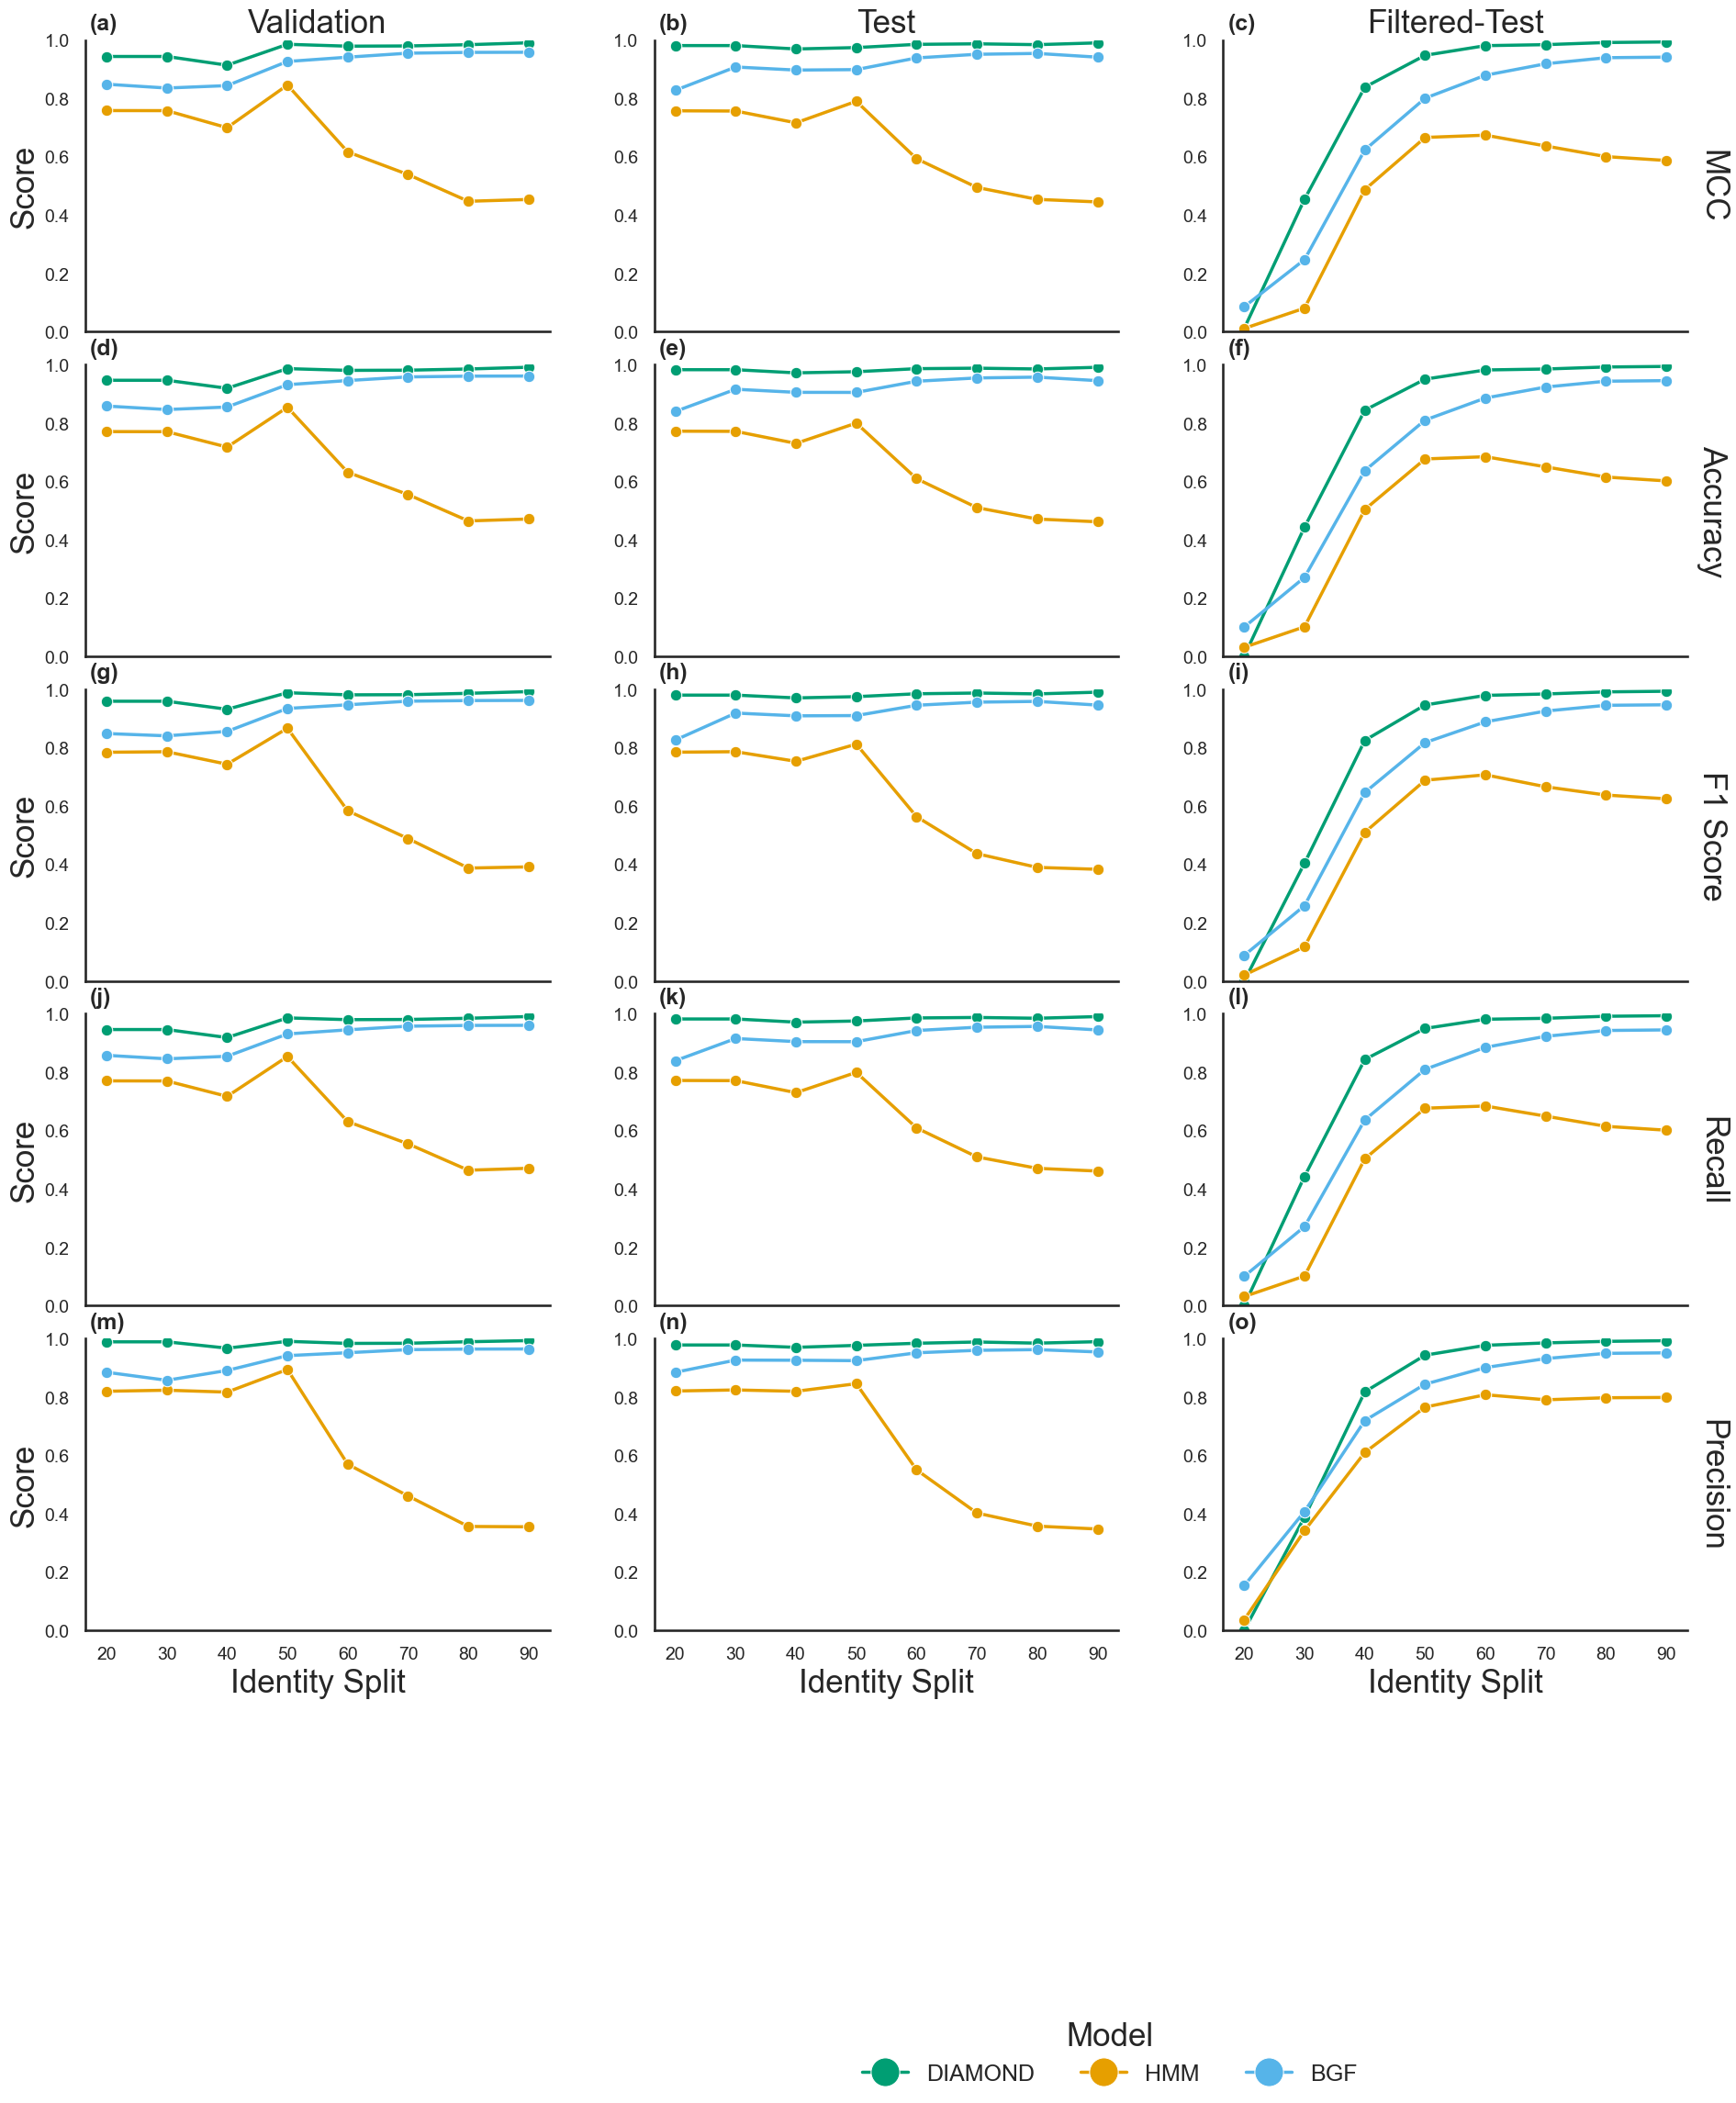

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import string
import pandas as pd

# Copy and rename models for prettiness
plot_df_pretty = plot_df.copy()
plot_df_pretty['Model'] = plot_df_pretty['Model'].replace({'Transformer': 'BGF'})

# Colorblind-friendly palette (now with DIAMOND)
palette = {
    'HMM': '#E69F00',
    'BGF': '#56B4E9',
    'DIAMOND': '#009E73'
}

# Clean styling
sns.set_style("white")
sns.set_context("talk", font_scale=1.4)

# Ensure Set is ordered: Validation first, Test second
plot_df_pretty['Set'] = pd.Categorical(
    plot_df_pretty['Set'],
    categories=['Validation', 'Test', 'Filtered-Test'],
    ordered=True
)

# Create FacetGrid
g = sns.FacetGrid(
    plot_df_pretty,
    row="Metric",
    col="Set",
    hue="Model",
    palette=palette,
    margin_titles=True,
    height=4.5,
    aspect=1.5,
    sharey=False
)

# Plot lines with markers
g.map(sns.lineplot, "Similarity Score", "Score", marker="o", linewidth=2.5)

# Format axes and remove clutter
for ax in g.axes.flat:
    ax.set_ylim(0, 1)
    ax.tick_params(labelsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(False)

# Remove "Metric =" and "Set =" from titles
g.set_titles(row_template="{row_name}", col_template="{col_name}")

# Label axes
g.set_axis_labels("Identity Split", "Score")

# 🎯 Fix the legend: centered with 3 models
g.add_legend(
    title="Model",
    fontsize=18,
    title_fontsize=20,
    frameon=False,
    markerscale=2.5,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.05),  # centered
    ncol=3
)

# Adjust plot layout for legend
g.fig.subplots_adjust(top=0.95, bottom=0.18)

# Add panel labels (a, b, c…)
axes = g.axes.flatten()
panel_labels = list(string.ascii_lowercase)
for i, ax in enumerate(axes):
    ax.text(
        0.01, 1.02, f"({panel_labels[i]})",
        transform=ax.transAxes,
        fontsize=18,
        fontweight='bold',
        va='bottom',
        ha='left'
    )

# Show the final plot
plt.show()


In [26]:
g.savefig("../../results/figures/evaluation_metrics_val_test_filtered_test.png", dpi=600, bbox_inches='tight')